In [1]:
import numpy as np
import pandas as pd
import xlrd
import math
from matplotlib import pyplot as plt
import Pricing.black_pricing as BS
import Pricing.SABR as SABR
from Pricing.Data_processor import data_reader,set_label,start_params
from Pricing.pdf_calculation import numerical_pdf
from Fitter.fitting import fitting,objfunc,calibration
from scipy.stats import lognorm
from Pricing.arbitrage_check import arbitrage_check

In [ ]:
        #label_strikes=['tenor','expiry','F']
        #for j in range(len(self.label_strikes)):
            #label_strikes.append(self.label_strikes[j])

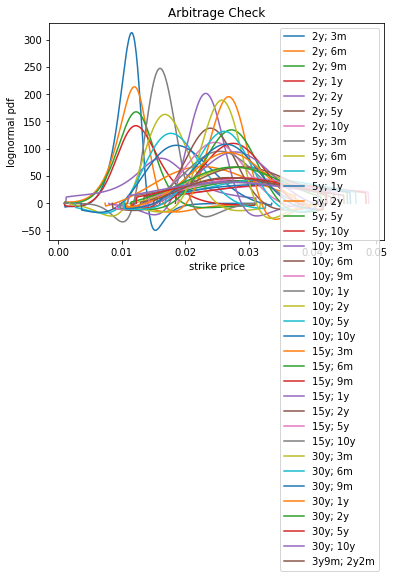

   tenor expiry         F     -150  -149  -148  -147  -146  -145  -144  \
0     2y     3m  0.010764  No data     1     1     1     1     1     1   
1     2y     6m  0.011099  No data     0     0     0     0     0     0   
2     2y     9m  0.011602  No data     0     0     0     0     0     0   
3     2y     1y  0.012194  No data     1     1     1     1     1     1   
4     2y     2y  0.016196  No data     0     0     0     0     0     0   
5     2y     5y  0.028436  No data     0     0     0     0     0     0   
6     2y    10y  0.033873  No data     0     0     0     0     0     0   
7     5y     3m  0.016017  No data     1     1     1     1     1     1   
8     5y     6m  0.016802  No data     1     1     1     1     1     1   
9     5y     9m  0.017682  No data     1     1     1     1     1     1   
10    5y     1y  0.018623  No data     1     1     1     1     1     1   
11    5y     2y  0.022384  No data     1     1     1     1     1     1   
12    5y     5y  0.030539  No data    

In [4]:
a = arbitrage_check('market_data.xlsx','Swaptions data')
print(a)  #0: arbitrage free; 1: arbitrage violation